## 지도학습 vs 비지도학습
+ 지도학습 : 데이터와 레이블을 이용해서 규칙/패턴 파악
+ 비지도학습 : 데이터만을 이용해서 유사도에 따른 패턴/규칙 파악

### Kmeans
+ 대표적 군집 알고리즘
+ 서로 유사성이 높은 것끼리 관측값을 묶어 다수의 그룹을 만드는 알고리즘
+ 즉, 동일 그룹내 구성원끼리는 유사성이 높고 다른 그룹내 구성원과의 유사성은 거의 없다는 의미
+ 군집기반 분석기법, SSW, SSB

### 유사도 파악
+ Kmeans에서는 각 점간의 거리가 가까울수록 비슷한 특성을 가진다고 보고 데이터들을 모음(군집)
+ 따라서, 유사도 측정을 위해 임의의 기준점 centeroid를 선정

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mldlpy3

In [2]:
x = 7, 2, 6, 3, 6, 5, 3, 1, 5, 7, 7, 2
y = 8, 4, 4, 2, 5, 7, 3, 4, 4, 7, 6, 1

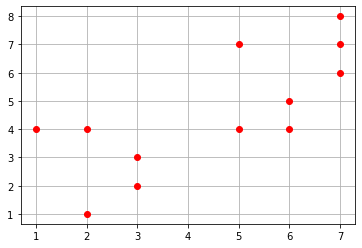

In [6]:
plt.plot(x, y, 'ro')
plt.grid()

#### 임의의 센터로이드 설정
+ c1(1,4), c2(7,8)

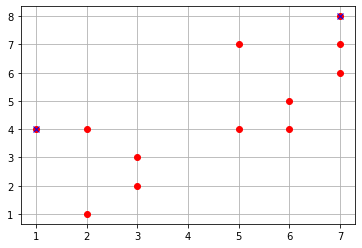

In [7]:
plt.plot(x, y, 'ro')
plt.plot([1,7],[4,8], 'bx')
plt.grid()

#### 센터로이드와 각 점들간 거리 계산 : 유클리드 거리 계산
+ 즉, A(X1, Y1)와 B(X2, Y2)간의 거리계산은 $ sqrt((X2 - X1)^2 + (Y2 - Y1)^2) $

#### C(2, 4)와 D(6,4)는 A, B 센터로이드 중 어디와 가까운가

In [14]:
math.sqrt((2 - 1)**2 + (4 -4)**2)

1.0

In [15]:
math.sqrt((2 - 7)**2 + (4 - 8)**2)

6.4031242374328485

In [16]:
math.sqrt((6 - 1)**2 + (4 - 4)**2)

5.0

In [17]:
math.sqrt((6 - 7)**2 + (4 - 8)**2)

4.123105625617661

#### C(2,4)는 C1으로 분류, D(6,4)는 C2로 분류

#### 새로운 중심점 설정
+ 모든 데이터에 대한 군집화가 수행된 후 새로운 중심점을 선정하고 다시 유사도에 의한 군집 실시
+ 새로운 중심점을 선정하는 방법은 각 군집별 평균값을 이용
+ 즉, 군집 C1, C2의 각 x/y 좌표간 평균계산
    + C1의 새로운 좌표
    + X좌표 : 1, 2, 2, 3, 3 / 5 = 2.2
    + y좌표 : 1, 2, 3, 4, 4 / 5 = 2.8
    + 새로운 센터로이드 = (2.2, 2.8)
    + C2의 새로운 좌표
    + X좌표 : 5,5,6,6,7,7,7 / 7 = 43/7
    + Y좌표 : 4,4,5,6,7,7,8 / 7 = 41/7
    + 새로운 센터로이드 = (6.14, 5.85)

#### 새로운 좌표 시각화

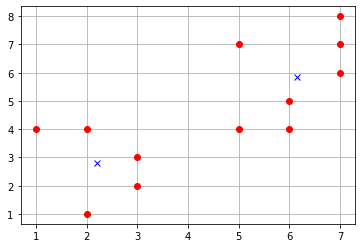

In [21]:
plt.plot(x,y, 'ro')
plt.grid()
plt.plot([2.2, 6.14], [2.8, 5.85], 'bx')

#### iris 데이터셋을 Kmeans로 군집화하기

In [31]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [48]:
iris = load_iris()

In [49]:
Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target, test_size=0.3, stratify = iris.target, random_state=2111151155)

#### 군집분석 실시
+ n_clusters : 군집수
+ max_iter : 군집화 시도횟수

In [50]:
kms = KMeans(n_clusters=3, max_iter = 100)

In [60]:
kms.fit(Xtrain)

KMeans(max_iter=100, n_clusters=3)

#### 군집 결과 평가 : 객체명.labels_에 저장되어 있음

In [52]:
kms.labels_

array([0, 2, 2, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 1, 2, 1, 2, 2,
       1, 2, 1, 2, 0, 2, 2, 1, 1, 1, 0, 2, 0, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 2, 0, 2,
       2, 1, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 2, 2, 1, 0,
       0, 0, 1, 1, 1, 2, 0, 2, 2, 2, 0, 2, 0, 1, 2, 1, 1], dtype=int32)

In [53]:
accuracy_score(kms.labels_, ytrain)

0.42857142857142855

#### 군집 시각화1

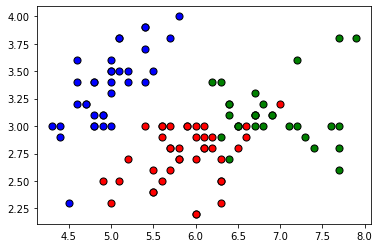

In [78]:
plt.scatter(Xtrain[kms.labels_ == 0,0], Xtrain[kms.labels_ == 0,1], s=50, marker='o', c='r', edgecolors='k')
plt.scatter(Xtrain[kms.labels_ == 1,0], Xtrain[kms.labels_ == 1,1], s=50, marker='o', c='b', edgecolors='k')
plt.scatter(Xtrain[kms.labels_ == 2,0], Xtrain[kms.labels_ == 2,1], s=50, marker='o', c='g', edgecolors='k')

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  """Entry point for launching an IPython kernel.


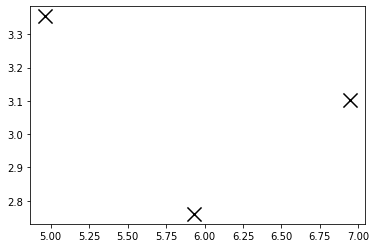

In [67]:
plt.scatter(kms.cluster_centers_[:,0], kms.cluster_centers_ [:,1], s=200, marker='x', c='k', edgecolors='r')

#### 군집 시각화2

In [77]:
plt.scatter(Xtrain[kms.labels_ == 0,2], Xtrain[kms.labels_ == 0,3], s=50, marker='o', c='r', edgecolors='k')
plt.scatter(Xtrain[kms.labels_ == 1,2], Xtrain[kms.labels_ == 1,3], s=50, marker='o', c='b', edgecolors='k')
plt.scatter(Xtrain[kms.labels_ == 2,2], Xtrain[kms.labels_ == 2,3], s=50, marker='o', c='g', edgecolors='k')

IndexError: boolean index did not match indexed array along dimension 0; dimension is 105 but corresponding boolean dimension is 52

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  """Entry point for launching an IPython kernel.


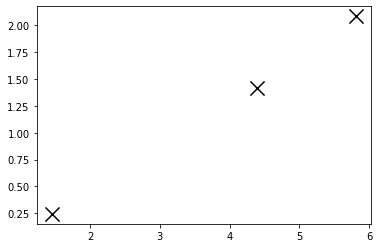

In [75]:
plt.scatter(kms.cluster_centers_[:,2], kms.cluster_centers_ [:,3], s=200, marker='x', c='k', edgecolors='r')

#### 군집 분석

In [54]:
kms.fit(Xtest)

KMeans(max_iter=100, n_clusters=3)

In [55]:
accuracy_score(kms.labels_, ytest)

0.4444444444444444

#### 군집 성능 평가
+ 실루엣 계수 : 군집 적합도를 수치로 나타낸 것
+ 1에 가까울수록 군집이 잘 된 것으로 파악

In [83]:
silhouette_score(Xtrain, kms.labels_, metric='euclidean')

0.568307598040377

#### 반복문을 통해 적절한 군집갯수와 그에 따른 실루엣 계수 확인

In [97]:
sss = []
els = []
for k in range(2, 11):
    kms = KMeans(n_clusters=k, max_iter=100)
    kms.fit(Xtrain)
    ss = silhouette_score(Xtrain, kms.labels_, metric='euclidean')
    els.append(kms.inertia_)
    sss.append(ss)

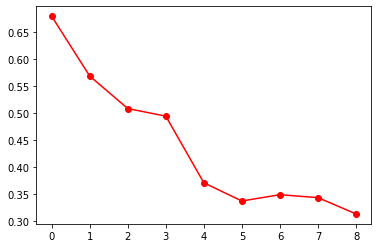

In [98]:
plt.plot(sss, 'ro-')

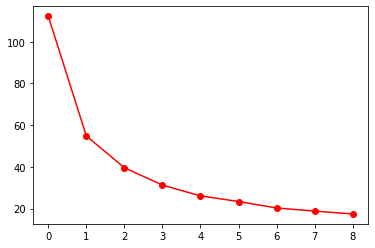

In [99]:
plt.plot(els, 'ro-') # 값이 급격히 바뀔수록 좋은 집단수

#### 엘보우계수로 적절한 군집수를 파악하기 쉬운 편

In [100]:
sss = []
els = []
for k in range(2, 11):
    kms = KMeans(n_clusters=k, max_iter=100)
    kms.fit(Xtest)
    ss = silhouette_score(Xtest, kms.labels_, metric='euclidean')
    sss.append(ss)
    els.append(kms.inertia_)

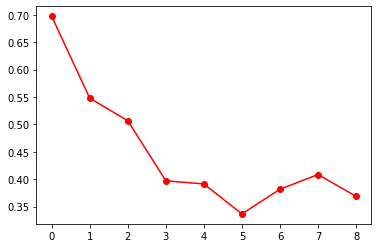

In [101]:
plt.plot(sss, 'ro-')

#### 실루엣 계수만으로는 적절한 군집 개수 파악이 어려움

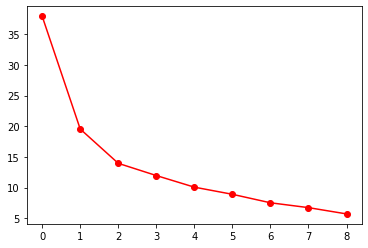

In [102]:
plt.plot(els, 'ro-')

#### 엘보우 계수 : 군집화가 된 후 각 중심점에서 군집 데이터간의 거리를 합산한 값
+ 군집이 어느 정도로 잘 되어 있는지를 나타내는 값 : 이 값이 높을수록 군집의 응집이 높다는 의미
+ 객체명.inertia_

#### 학생성적과 집중도를 기준으로 클래스를 나누려고 할 때 몇 개의 반으로 나누는 것이 좋을지 알아보기 

In [155]:
ac= pd.read_csv('data/academy.csv', encoding='euc-kr')

In [156]:
ac.head()

,학생번호,국어점수평균,수학점수평균,영어점수평균,과학점수평균,학업집중도
0,1,90,75,85,60,70
1,2,65,90,60,88,80
2,3,45,53,48,50,60
3,4,77,96,62,92,70
4,5,88,89,80,82,90


In [157]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   학생번호    52 non-null     int64
 1   국어점수평균  52 non-null     int64
 2   수학점수평균  52 non-null     int64
 3   영어점수평균  52 non-null     int64
 4   과학점수평균  52 non-null     int64
 5   학업집중도   52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [158]:
data = ac.iloc[:, 1:]

In [162]:
sss = []
els = []
for k in range(2, 11):
    kms = KMeans(n_clusters=k, max_iter=100)
    kms.fit(data)
    ss = silhouette_score(data, kms.labels_, metric = 'euclidean')
    els.append(kms.inertia_)
    sss.append(ss)

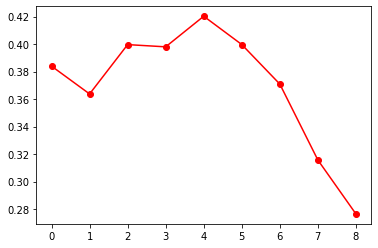

In [163]:
plt.plot(sss, 'ro-')

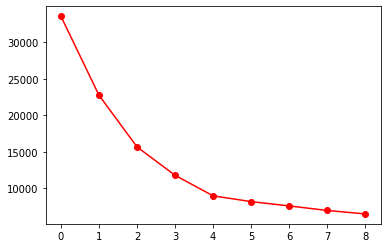

In [164]:
plt.plot(els, 'ro-')

#### 엘보우 계수 확인결과 적절한 군집의 개수는 3~4개

#### 군집의 개수가 3일때

In [191]:
kms = KMeans(n_clusters=3, max_iter = 100, random_state = 2111151440)

In [192]:
kms.fit(data)

KMeans(max_iter=100, n_clusters=3, random_state=2111151440)

In [193]:
kms.labels_

array([2, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2, 0,
       1, 0, 2, 1, 2, 1, 1, 0], dtype=int32)

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  after removing the cwd from sys.path.


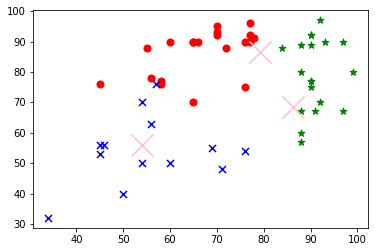

In [194]:
plt.scatter(data.iloc[kms.labels_ == 0,0], data.iloc[kms.labels_ == 0,1], s=50, c='red', marker='o') 
plt.scatter(data.iloc[kms.labels_ == 1,0], data.iloc[kms.labels_ == 1,1], s=50, c='blue', marker='x') 
plt.scatter(data.iloc[kms.labels_ == 2,0], data.iloc[kms.labels_ == 2,1], s=50, c='green', marker='*') 
plt.scatter(kms.cluster_centers_[:,1], kms.cluster_centers_ [:,2], s=500, marker='x', c='pink', edgecolors='k')

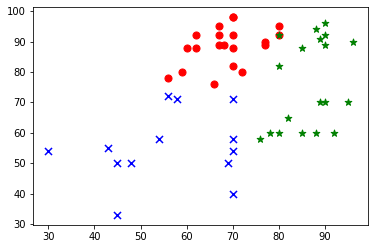

In [195]:
plt.scatter(data.iloc[kms.labels_ == 0,2], data.iloc[kms.labels_ == 0,3], s=50, c='red', marker='o') 
plt.scatter(data.iloc[kms.labels_ == 1,2], data.iloc[kms.labels_ == 1,3], s=50, c='blue', marker='x') 
plt.scatter(data.iloc[kms.labels_ == 2,2], data.iloc[kms.labels_ == 2,3], s=50, c='green', marker='*') 


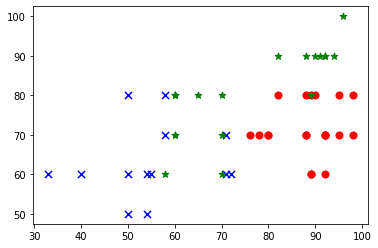

In [196]:
plt.scatter(data.iloc[kms.labels_ == 0,3], data.iloc[kms.labels_ == 0,4], s=50, c='red', marker='o') 
plt.scatter(data.iloc[kms.labels_ == 1,3], data.iloc[kms.labels_ == 1,4], s=50, c='blue', marker='x') 
plt.scatter(data.iloc[kms.labels_ == 2,3], data.iloc[kms.labels_ == 2,4], s=50, c='green', marker='*') 

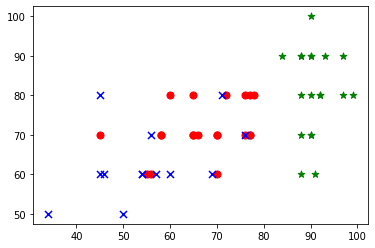

In [ ]:
plt.scatter(data.iloc[kms.labels_ == 0,0], data.iloc[kms.labels_ == 0,4], s=50, c='red', marker='o') 
plt.scatter(data.iloc[kms.labels_ == 1,0], data.iloc[kms.labels_ == 1,4], s=50, c='blue', marker='x') 
plt.scatter(data.iloc[kms.labels_ == 2,0], data.iloc[kms.labels_ == 2,4], s=50, c='green', marker='*') 

#### 군집의 개수가 4일때

In [205]:
kms = KMeans(n_clusters=4, max_iter = 100, random_state = 2111151440)

In [206]:
kms.fit(data)

KMeans(max_iter=100, n_clusters=4, random_state=2111151440)

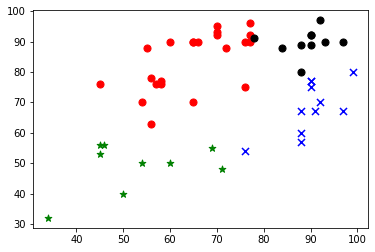

In [208]:
plt.scatter(data.iloc[kms.labels_ == 0,0], data.iloc[kms.labels_ == 0,1], s=50, c='red', marker='o') 
plt.scatter(data.iloc[kms.labels_ == 1,0], data.iloc[kms.labels_ == 1,1], s=50, c='blue', marker='x') 
plt.scatter(data.iloc[kms.labels_ == 2,0], data.iloc[kms.labels_ == 2,1], s=50, c='green', marker='*')
plt.scatter(data.iloc[kms.labels_ == 3,0], data.iloc[kms.labels_ == 3,1], s=50, c='k', marker='o')

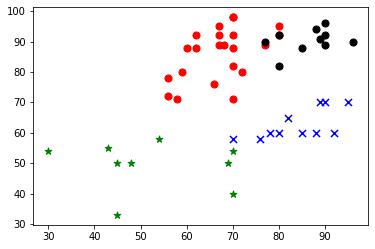

In [209]:
plt.scatter(data.iloc[kms.labels_ == 0,2], data.iloc[kms.labels_ == 0,3], s=50, c='red', marker='o') 
plt.scatter(data.iloc[kms.labels_ == 1,2], data.iloc[kms.labels_ == 1,3], s=50, c='blue', marker='x')
plt.scatter(data.iloc[kms.labels_ == 2,2], data.iloc[kms.labels_ == 2,3], s=50, c='green', marker='*')
plt.scatter(data.iloc[kms.labels_ == 3,2], data.iloc[kms.labels_ == 3,3], s=50, c='k', marker='o')

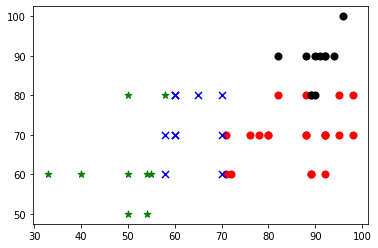

In [210]:
plt.scatter(data.iloc[kms.labels_ == 0,3], data.iloc[kms.labels_ == 0,4], s=50, c='red', marker='o') 
plt.scatter(data.iloc[kms.labels_ == 1,3], data.iloc[kms.labels_ == 1,4], s=50, c='blue', marker='x') 
plt.scatter(data.iloc[kms.labels_ == 2,3], data.iloc[kms.labels_ == 2,4], s=50, c='green', marker='*')
plt.scatter(data.iloc[kms.labels_ == 3,3], data.iloc[kms.labels_ == 3,4], s=50, c='k', marker='o')

In [128]:
academy['전체평균'] = (academy['국어점수평균'] + academy['국어점수평균'] + academy['국어점수평균'] + academy['국어점수평균']) / 4

In [129]:
x = academy['전체평균']
y = academy['학업집중도']

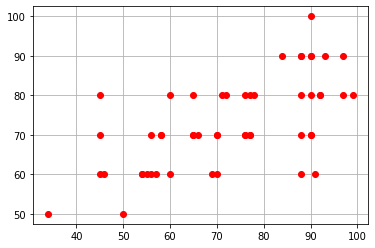

In [113]:
plt.plot(x, y, 'ro')
plt.grid()